**MENTAL HEALTH ANALYSIS**

This dataset dives into how working remotely affects stress levels, work-life balance, and mental health conditions across various industries and regions.

With 5,000 records collected from employees worldwide, this dataset provides valuable insights into key areas like work location (remote, hybrid, onsite), stress levels, access to mental health resources, and job satisfaction. It is designed to help researchers, HR professionals, and businesses assess the growing influence of remote work on productivity and well-being.

Columns:

**Employee_ID** : Unique identifier for each employee.

**Age** : Age of the employee.

**Gender** : Gender of the employee.

**Job_Role** : Current role of the employee.

**Industry** : Industry they work in.

**Work_Location** : Whether they work remotely, hybrid, or onsite.

**Stress_Level** : Their self-reported level of stress.

**Mental_Health_Condition** : Any mental health condition reported (Anxiety, Depression, etc.).

**Social_Isolation_Rating** : A self-reported rating (1-5) on how isolated they feel.

**Satisfaction_with_Remote_Work** : How satisfied they are with remote work arrangements (Satisfied, Neutral, Unsatisfied).

**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

**Loading the CSV File**

In [ ]:
df = pd.read_csv('Mental Health Analysis.csv')

In [ ]:
#Displays first 5 rows of the dataset
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


**Data Wrangling**

Wrangling is the part where we make sure that the data we collected for analysis is of good quality. Here we assess the data quality and clean the data. Wrangling is the part where we take care of missing data, duplicate data, incorrect datatypes etc.,

In [ ]:
#Displays concise summary of the dataset- column names, datatypes, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

**Handling missing values**

In [ ]:
#Displays missing values in each column
df.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


In [ ]:
#Fill missing values in the column with mode(most frequent value)
mental_health_mode = df['Mental_Health_Condition'].mode()[0]
df['Mental_Health_Condition'].fillna(mental_health_mode, inplace=True)

<ipython-input-6-2dd3bd2df4af>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mental_Health_Condition'].fillna(mental_health_mode, inplace=True)


In [ ]:
##Fill missing values in the column with mode(most frequent value)
physical_activity_mode = df['Physical_Activity'].mode()[0]
df['Physical_Activity'].fillna(physical_activity_mode, inplace=True)

<ipython-input-7-481b1a62f9e6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Physical_Activity'].fillna(physical_activity_mode, inplace=True)


In [ ]:
df.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


In [ ]:
#To check duplicate values
sum(df.duplicated())

0

**EDA- Exploratory Data Analysis**

Here we analyze and visualize data to find out what data tell us. It helps understand the dataset's structure, distributions, and potential correlations, guiding decisions for preprocessing and feature engineering.

<ipython-input-10-f6cf48d9b791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


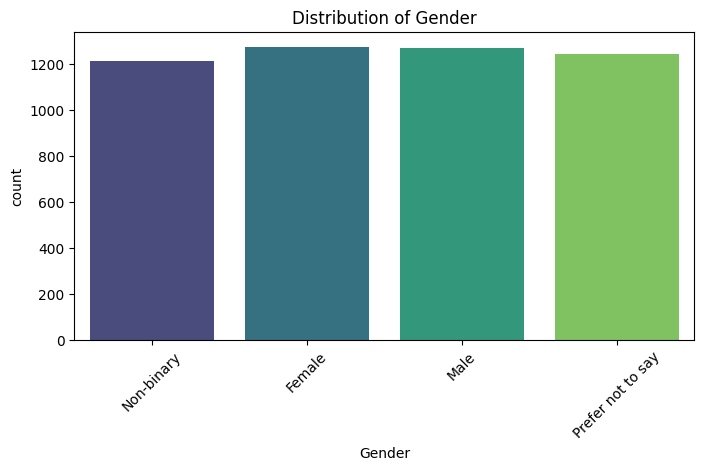

<ipython-input-10-f6cf48d9b791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


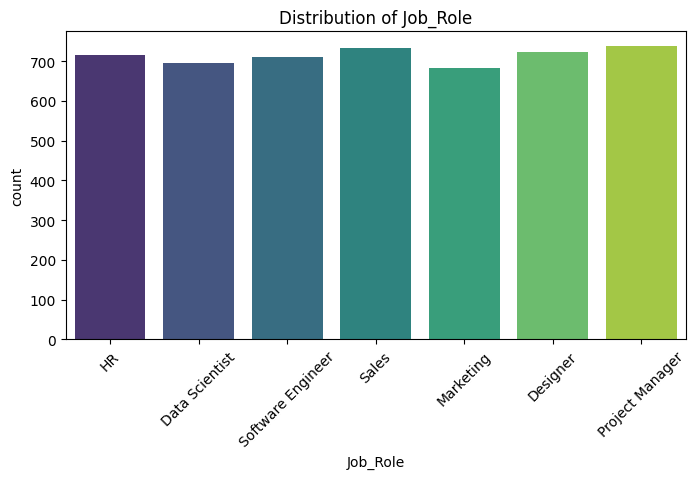

<ipython-input-10-f6cf48d9b791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


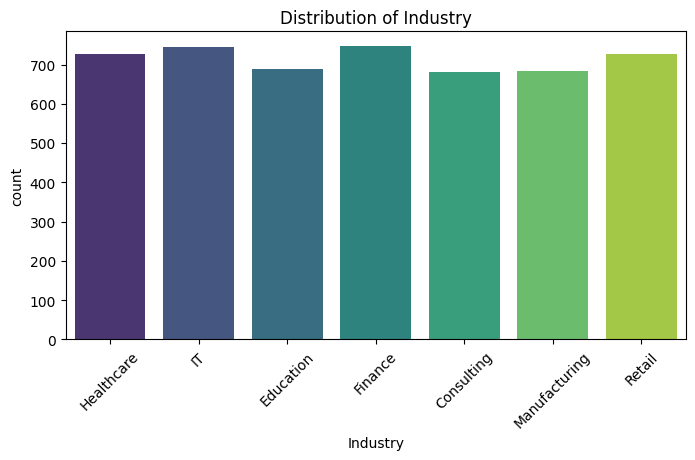

<ipython-input-10-f6cf48d9b791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


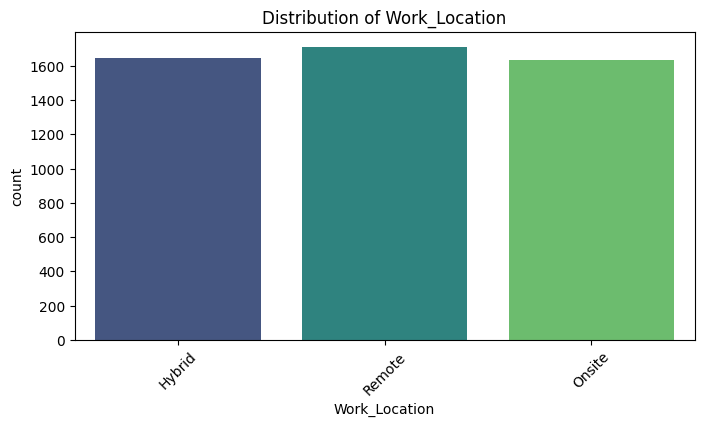

<ipython-input-10-f6cf48d9b791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


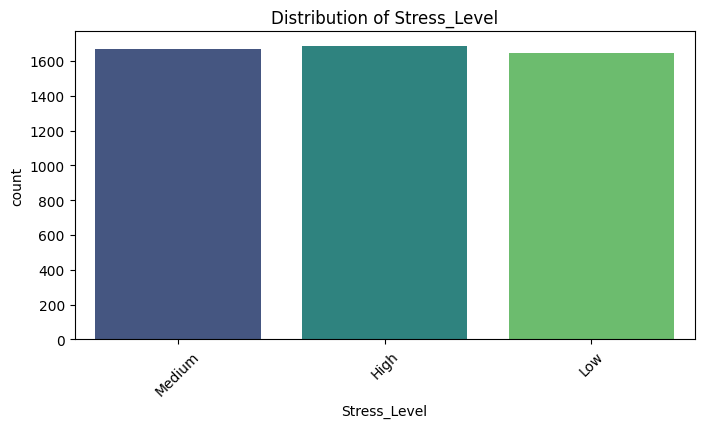

<ipython-input-10-f6cf48d9b791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


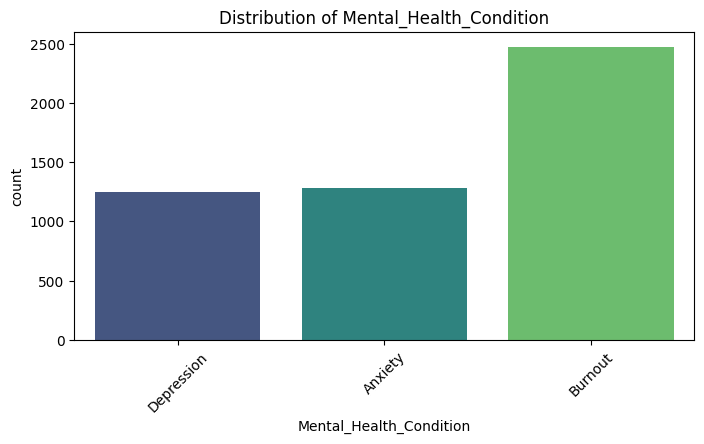

<ipython-input-10-f6cf48d9b791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


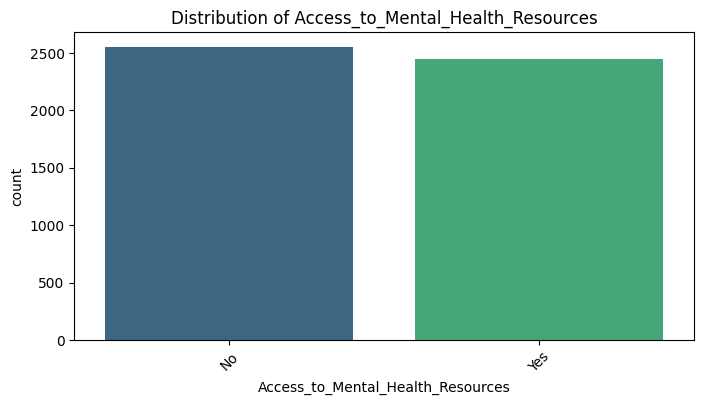

<ipython-input-10-f6cf48d9b791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


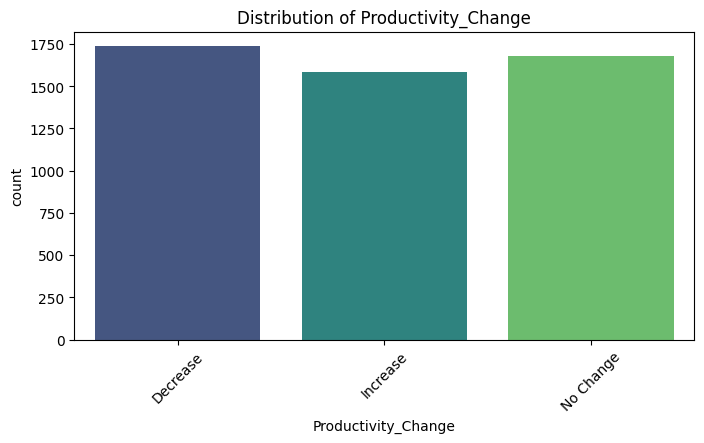

<ipython-input-10-f6cf48d9b791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


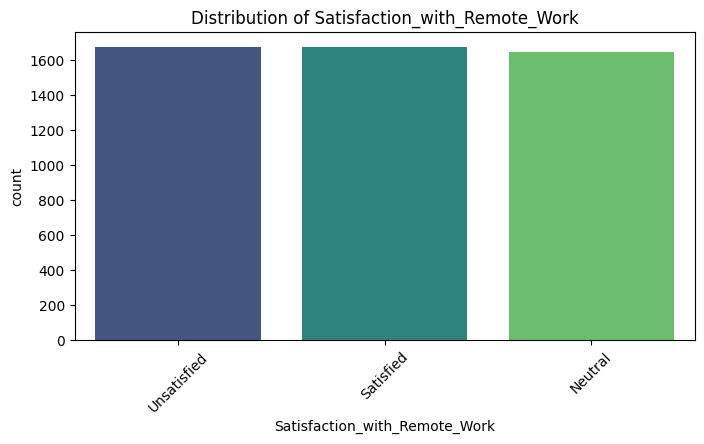

<ipython-input-10-f6cf48d9b791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


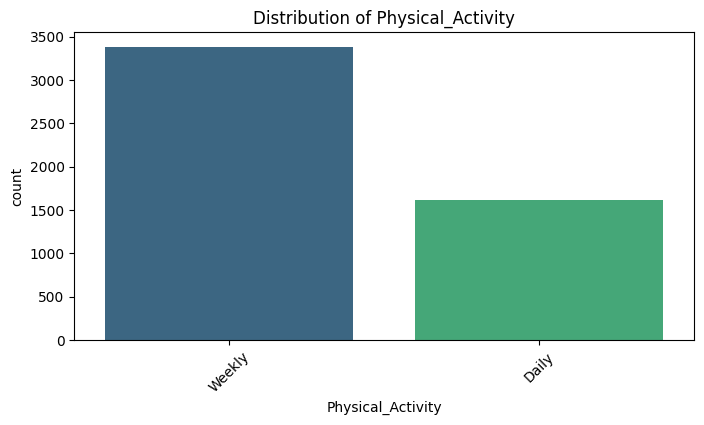

<ipython-input-10-f6cf48d9b791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


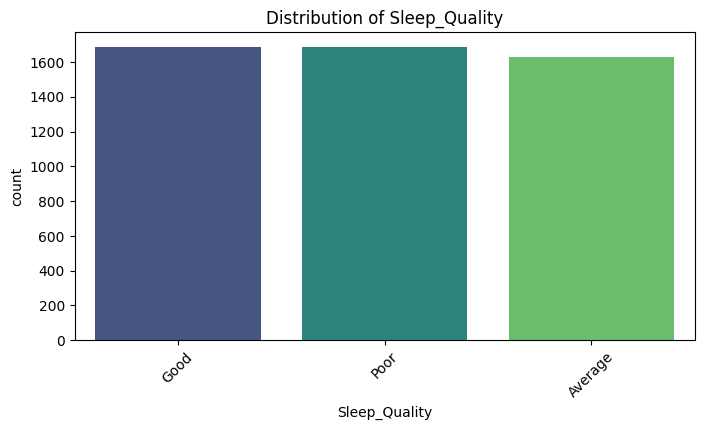

<ipython-input-10-f6cf48d9b791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


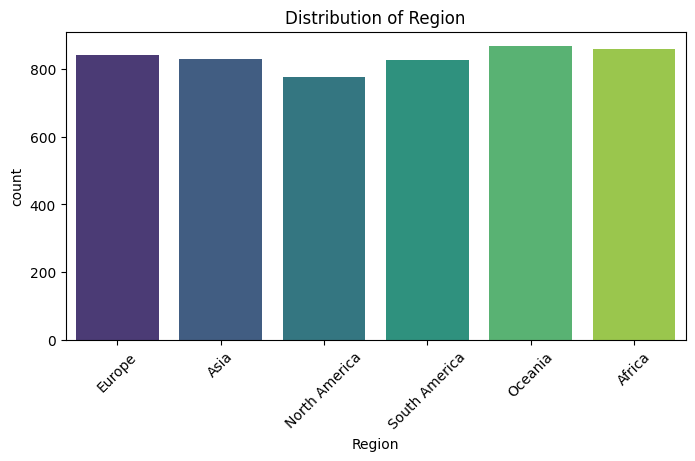

In [ ]:
# Count plots for each categorical column
categorical_cols = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level', 'Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Region']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

### Inference or Conclusion from Count Plot Analysis

The distribution of the dataset reveals key insights about the population and its characteristics. In terms of **gender**, there is a significant representation of male and female employees compared to "prefer not to say" and "non-binary" categories, indicating some gender diversity but potential underrepresentation of certain groups. The **Job Role** distribution shows a higher concentration in sales and project management, with fewer employees in specialized roles like data science and marketing.

The **Industry** plot highlights a dominance of finance and IT sectors, followed by healthcare and retail, suggesting the dataset is more skewed toward corporate environments. **Work Location** trends indicate that remote work is the most common setup, reflecting the current global preference for flexible working arrangements.

Stress levels show a concerning pattern, with a majority experiencing high stress, aligning with the finding that **burnout** is the most frequently reported mental health condition. Additionally, **Access to Mental Health Resources** shows that nearly half of the population lacks access, which may be contributing to stress and productivity issues.

Productivity change data indicates a decline in productivity for many, although there is a balance across the three categories. **Satisfaction with Remote Work** appears evenly distributed, indicating diverse opinions about remote work setups. Physical activity levels are predominantly weekly, while **Sleep Quality** shows significant challenges, with many reporting poor or average sleep.

Regional analysis shows a diverse dataset with notable representation across continents, especially Oceania, Africa, and Asia. These patterns emphasize the need for organizations to address mental health resources, promote work-life balance, and create targeted wellness initiatives tailored to specific demographics and roles.

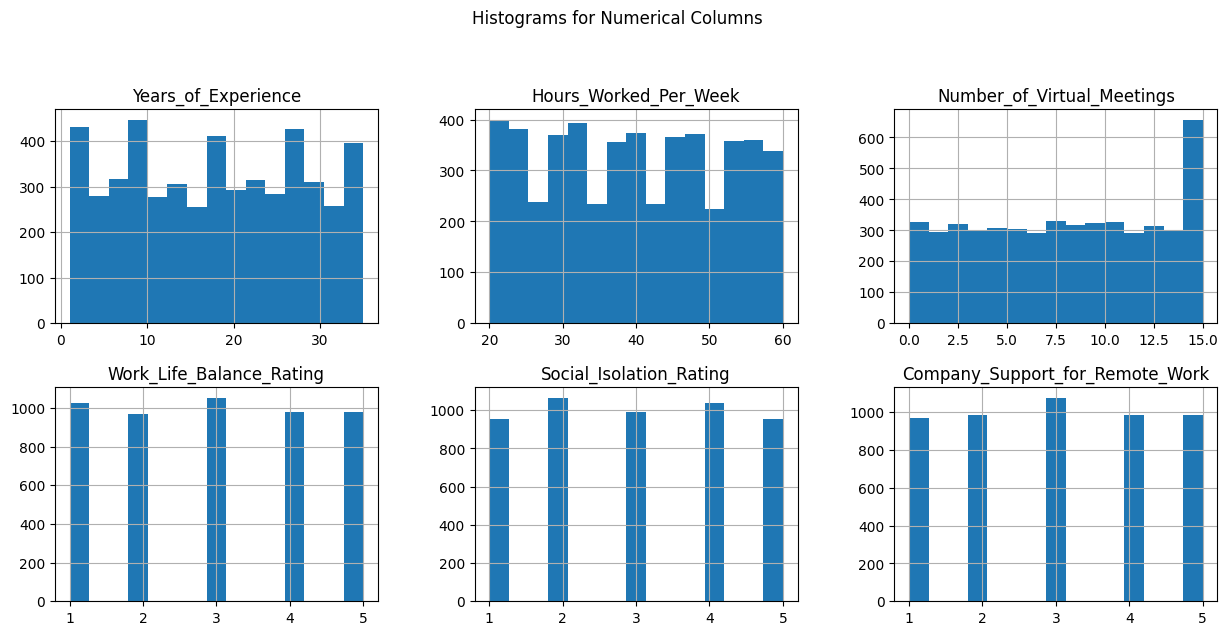

In [ ]:
# Plot histograms for numerical columns
# Count plots for each numerical column
numerical_cols = [
    'Years_of_Experience',
    'Hours_Worked_Per_Week',
    'Number_of_Virtual_Meetings',
    'Work_Life_Balance_Rating',
    'Social_Isolation_Rating',
    'Company_Support_for_Remote_Work'
]

df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Histograms for Numerical Columns")
plt.show()

### Conclusion from Histogram Visualization

The histograms for the numerical columns reveal various patterns and distributions within the dataset:

1. **Age**: The distribution appears relatively uniform, but there are noticeable peaks in the 20–25 and 45–50 age groups, reflecting a mix of young and experienced professionals.

2. **Years of Experience**: The highest concentration is in the 8–10 year range, with a gradual decline as years of experience increase, indicating a predominantly mid-career workforce.

3. **Hours Worked Per Week**: The data shows a fairly consistent distribution, with more individuals working around 20–25 hours weekly. This indicates a range of workloads, likely based on job roles or company policies.

4. **Number of Virtual Meetings**: There is a sharp peak at the highest bin (>14 meetings), showing that a significant portion of employees attend frequent virtual meetings.

5. **Work-Life Balance Rating**: The ratings are evenly distributed, with a slight peak at 3, reflecting that most employees perceive their work-life balance as average.

6. **Social Isolation Rating**: The ratings are similarly distributed, with most individuals rating their isolation as mild (2) or moderate (3 and 4), indicating varying levels of social connectivity.

7. **Company Support for Remote Work**: The ratings are evenly spread, with a peak at 3, suggesting that employees view company support for remote work as average or moderate.

Overall, these visualizations highlight diverse experiences across age, workload, and workplace support, emphasizing the need to address remote work dynamics, work-life balance, and social connectivity for enhanced employee well-being.

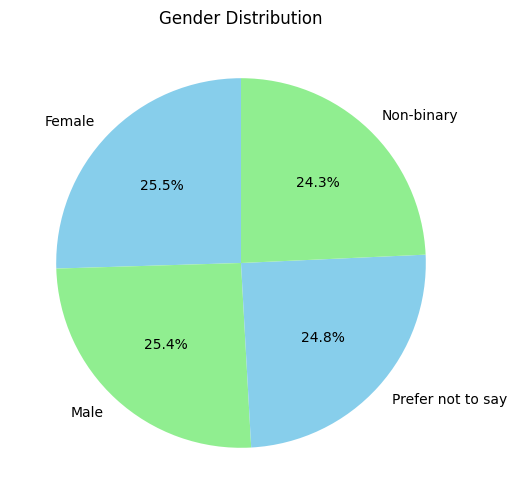

In [ ]:
# Pie chart for gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()

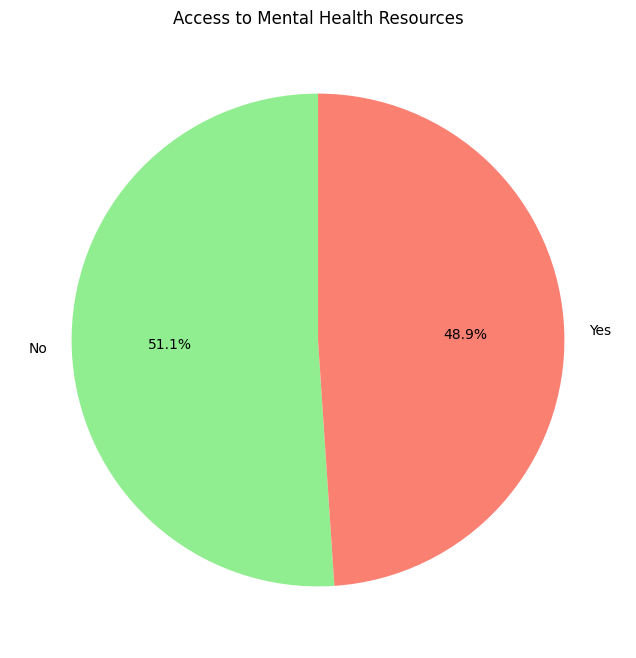

In [ ]:
# Pie chart for Access to Mental Health Resources
plt.figure(figsize=(8, 8))
df['Access_to_Mental_Health_Resources'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Access to Mental Health Resources')
plt.ylabel('')
plt.show()

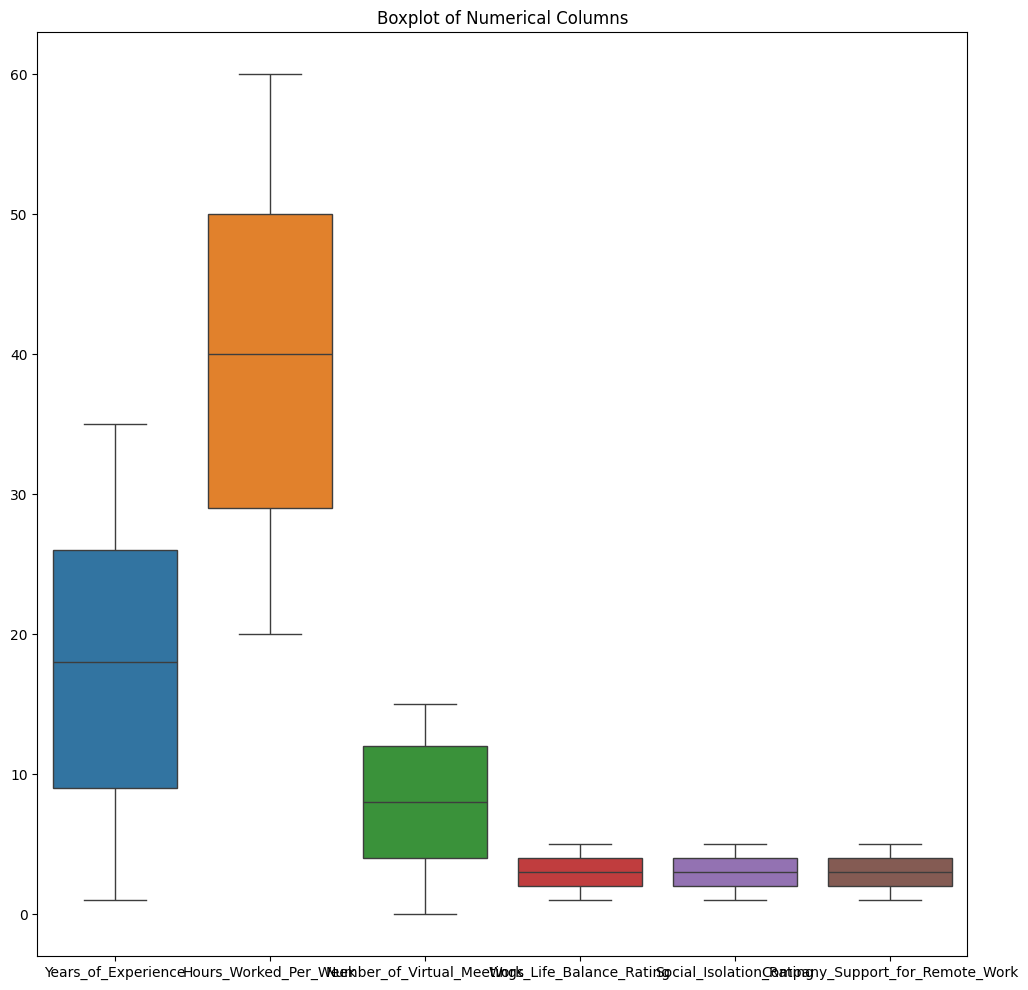

In [ ]:
# Box plot: of Numerical Columns
plt.figure(figsize=(12,12))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot of Numerical Columns")
plt.show()

Here’s a summary of the boxplot observations for the six columns:

1. **Years of Experience**:  
   - Median value is around 10 years.  
   - Data is spread out with a wide interquartile range (IQR), indicating diverse levels of experience.  
   - Few outliers are present on the higher end.

2. **Hours Worked Per Week**:  
   - Median is around 40 hours, typical for a workweek.  
   - Larger variability compared to other metrics, with some employees working significantly more hours.  

3. **Number of Virtual Meetings**:  
   - Median is moderately low, and most values are clustered with a smaller spread.  
   - No extreme outliers, suggesting consistency in virtual meetings.

4. **Work-Life Balance Rating**:  
   - The median rating is low, indicating potential dissatisfaction with work-life balance.  
   - Small spread and no significant outliers.

5. **Social Isolation Rating**:  
   - Median is low, showing limited reporting of severe social isolation.  
   - Spread is narrow, indicating most employees report similar levels of isolation.

6. **Company Support for Remote Work**:  
   - Median is relatively low to moderate, suggesting room for improvement in support for remote work.  
   - Narrow spread, with most ratings being similar.

The plots reveal significant diversity in **Years of Experience** and **Hours Worked**, while ratings for work-life balance, social isolation, and company support are generally low and consistent across employees. This may indicate challenges with employee satisfaction and well-being.

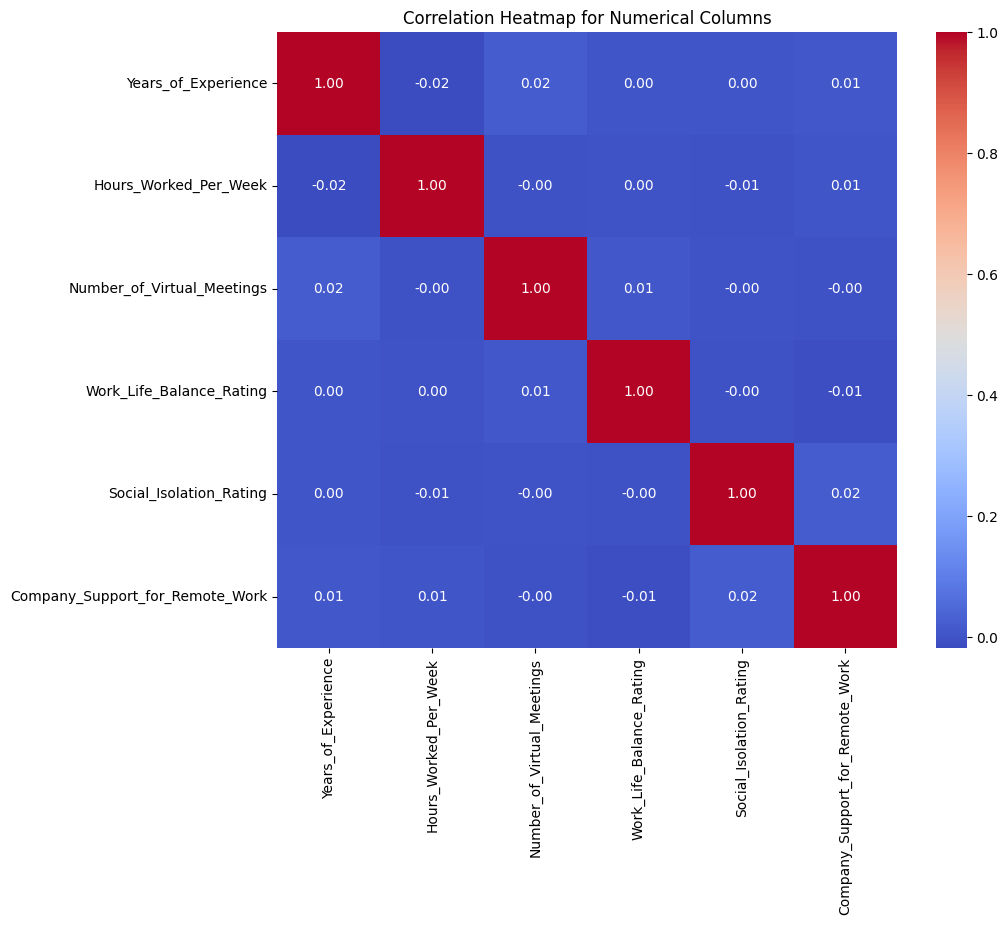

In [ ]:
#Correlation Heatmap for Numerical Columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

This heatmap visualizes the correlation between numerical columns in the dataset. Key observations from the plot include:

1. **Weak Correlations**: Most of the correlations between the variables are close to 0, indicating very weak or no linear relationships between the numerical columns.
   
2. **No Strong Positive or Negative Relationships**: There are no strong positive (close to +1) or negative (close to -1) correlations among the variables.

3. **Notable Values**:
   - **Years of Experience and Age**: The correlation is strong (+1.00), as expected since age and years of experience are typically closely related.
   - Other variables like **Work-Life Balance Rating**, **Hours Worked Per Week**, and **Social Isolation Rating** show negligible correlations with each other and other variables.

### Conclusion:
The dataset shows minimal linear relationships among most variables, with the exception of a perfect correlation between age and years of experience. This suggests that these factors are largely independent and may not directly influence one another.

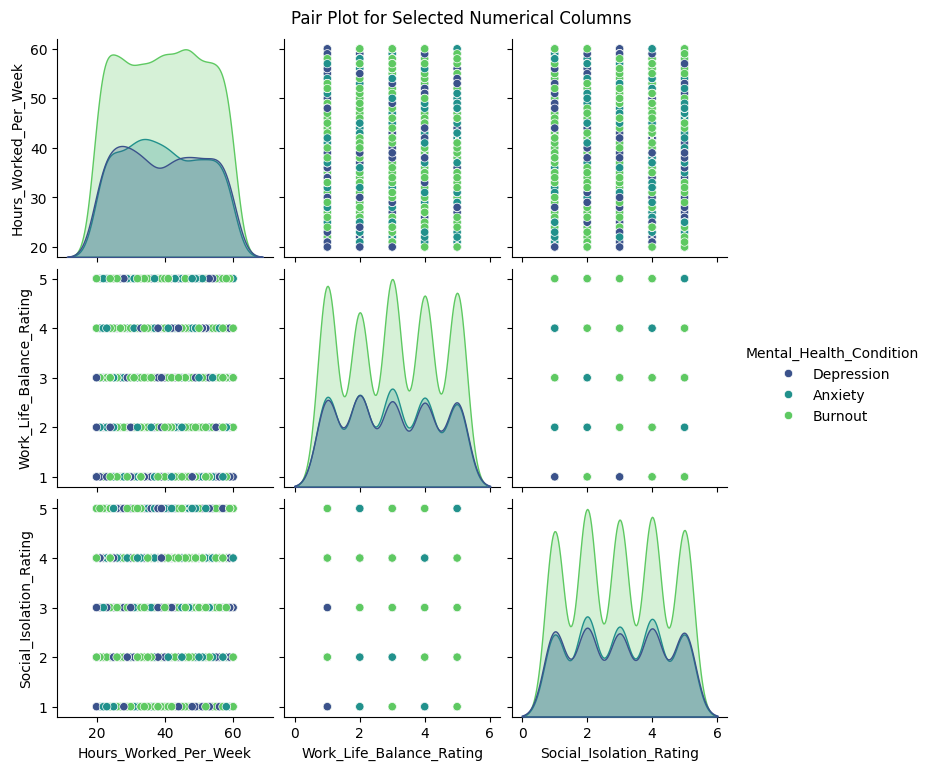

In [ ]:
#Pair Plot for Numerical Columns of Interest
sns.pairplot(df, vars=["Hours_Worked_Per_Week", "Work_Life_Balance_Rating", "Social_Isolation_Rating"], hue="Mental_Health_Condition", palette="viridis")
plt.suptitle("Pair Plot for Selected Numerical Columns", y=1.02)
plt.show()

This pair plot provides insights into the relationships between three numerical variables (`Hours_Worked_Per_Week`, `Work_Life_Balance_Rating`, and `Social_Isolation_Rating`) and their distribution across different mental health conditions (`Depression`, `Anxiety`, and `Burnout`). Here are some conclusions that can be drawn:

### General Observations:
1. **Hours Worked Per Week Distribution**:
   - The distribution of hours worked per week appears similar across all mental health conditions, with most individuals working between 30-50 hours.
   - There is no distinct separation between the groups based on hours worked, suggesting it might not be a strong predictor for mental health conditions on its own.

2. **Work-Life Balance Rating**:
   - Individuals with `Depression` and `Anxiety` are spread across the entire rating range.
   - `Burnout` appears more concentrated in lower work-life balance ratings, which aligns with the expectation that poor work-life balance correlates with burnout.

3. **Social Isolation Rating**:
   - There is some overlap among conditions, but higher social isolation ratings seem slightly more associated with `Burnout` and `Anxiety`.
   - Lower social isolation ratings appear to have individuals from all conditions.

### Correlation Insights:
- **Work-Life Balance and Social Isolation**:
   - There might be a negative relationship, as lower work-life balance ratings often align with higher social isolation ratings, especially in cases of `Burnout`.
- **Work Hours and Mental Health**:
   - Work hours alone do not show clear clustering for any condition, suggesting that its interaction with other factors (like work-life balance) may be more critical.



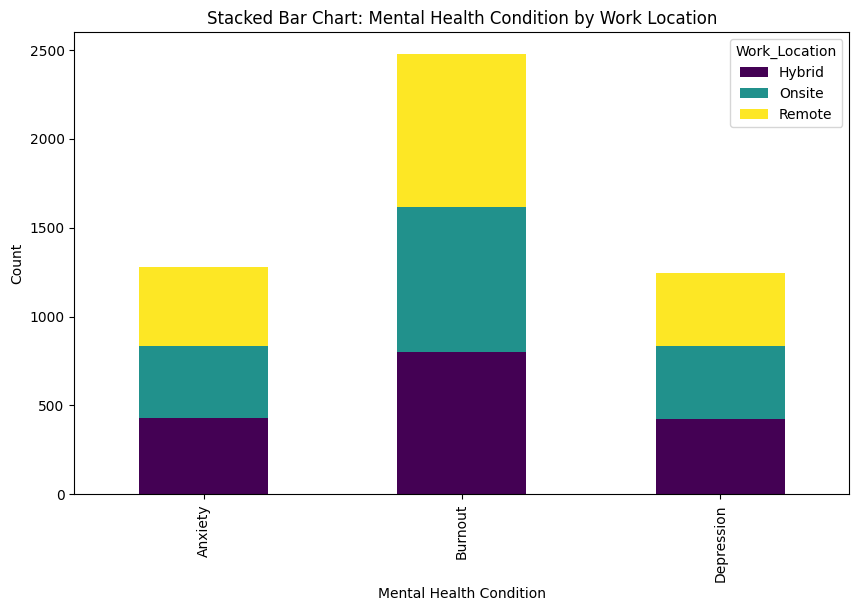

In [ ]:
#Stacked Bar Charts for Mental Health Condition by Work Location
# Cross-tabulate Mental_health_condition by Work_location
cross_tab = pd.crosstab(df['Mental_Health_Condition'], df['Work_Location'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Stacked Bar Chart: Mental Health Condition by Work Location")
plt.xlabel("Mental Health Condition")
plt.ylabel("Count")
plt.show()

This stacked bar chart shows the distribution of mental health conditions (`Anxiety`, `Burnout`, `Depression`) across different work locations (`Hybrid`, `Onsite`, and `Remote`). Here are the key takeaways:

### Observations:
1. **Burnout Dominates Across Work Locations**:
   - Burnout has the highest count compared to anxiety and depression across all work locations.
   - It indicates that burnout is a prevalent issue in the dataset, regardless of work setup.

2. **Work Location Distribution**:
   - **Remote work** has the highest contribution to burnout. This suggests that remote work might be a significant factor influencing burnout, possibly due to challenges like isolation or blurred work-life boundaries.
   - **Onsite work** also contributes substantially to burnout but less than remote work.
   - **Hybrid work** has the lowest contribution to burnout, indicating that a balance between onsite and remote work may help mitigate burnout.

3. **Anxiety and Depression Patterns**:
   - Anxiety and depression show a similar distribution across work locations, with hybrid work being the least associated, followed by onsite and remote work.
   - Remote work contributes more significantly to these mental health conditions compared to hybrid or onsite setups.

4. **Hybrid Work's Protective Effect**:
   - Across all conditions, hybrid work consistently has the smallest contribution, suggesting it may provide a healthier balance and reduce the likelihood of experiencing these mental health conditions.

### Recommendations:
1. **Promote Hybrid Work Models**:
   - Organizations could consider offering hybrid work arrangements as a way to mitigate mental health challenges.
   
2. **Focus on Remote Work Challenges**:
   - For remote workers, addressing issues like social isolation, work-life balance, and communication gaps might help reduce burnout, anxiety, and depression.

3. **Support Onsite Workers**:
   - While less prominent than remote work, onsite work still contributes significantly to mental health conditions. Providing flexibility, stress management resources, and wellness programs could help.

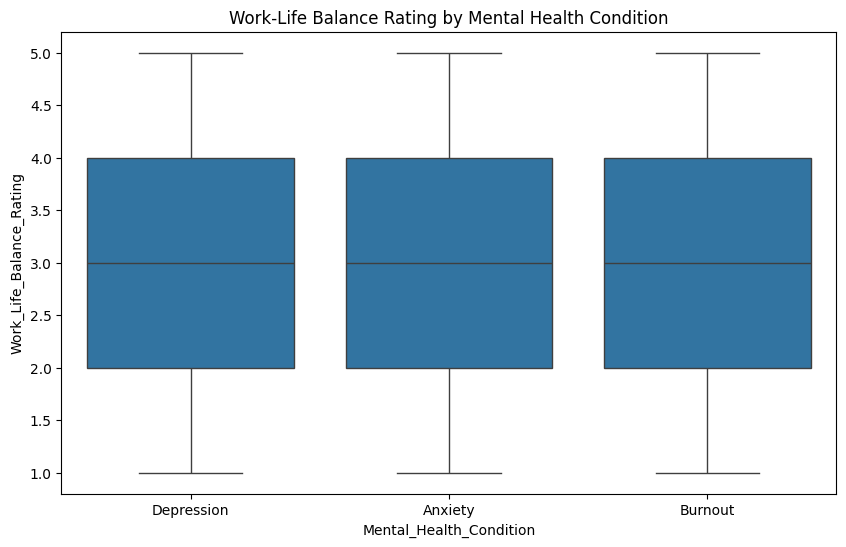

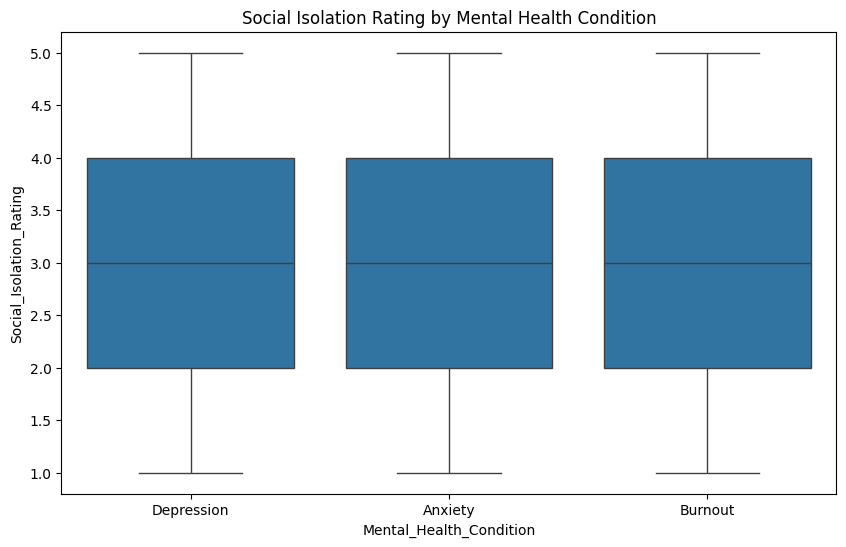

In [ ]:
#Box Plot of Work-Life Balance and Social Isolation Rating by Mental Health Condition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Mental_Health_Condition", y="Work_Life_Balance_Rating")
plt.title("Work-Life Balance Rating by Mental Health Condition")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Mental_Health_Condition", y="Social_Isolation_Rating")
plt.title("Social Isolation Rating by Mental Health Condition")
plt.show()

The two box plots compare ratings of **Work-Life Balance** and **Social Isolation** among individuals with different mental health conditions (Depression, Anxiety, and Burnout). Here's the conclusion:

### 1. **Work-Life Balance Rating by Mental Health Condition**:
- The median work-life balance rating is similar across all three conditions (Depression, Anxiety, and Burnout), centered around the mid-scale (approximately 3).
- The range of ratings, as indicated by the interquartile range (IQR), is also similar across conditions.
- There are no significant outliers or unique patterns that suggest substantial differences between the groups.

### 2. **Social Isolation Rating by Mental Health Condition**:
- Similarly, the median social isolation rating is consistent across all three groups, around 3.
- The spread of ratings (IQR and overall range) is comparable across Depression, Anxiety, and Burnout.
- As with the work-life balance, there are no strong indications of a distinct difference between the groups.

Both the work-life balance and social isolation ratings show uniformity across the mental health conditions. This suggests that these factors may not vary significantly among individuals with Depression, Anxiety, or Burnout in this dataset.

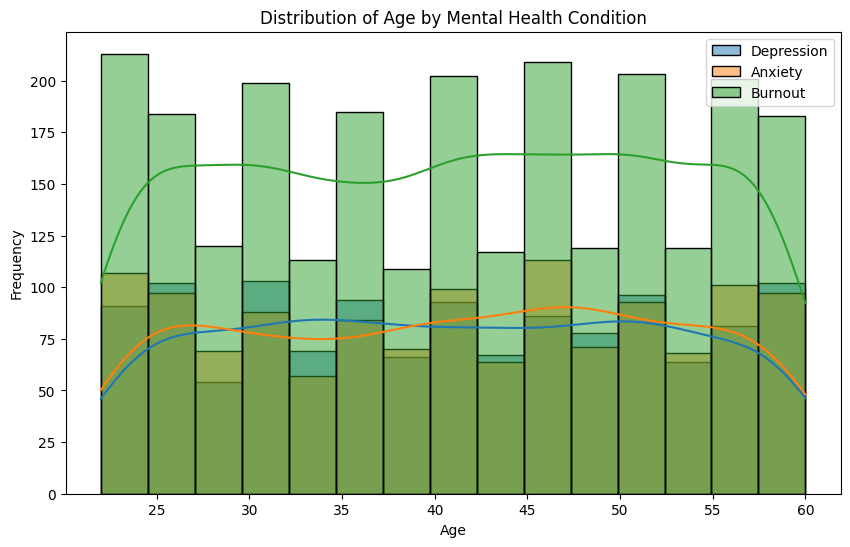

In [ ]:
#Grouped Histograms for Age by Mental Health Condition
plt.figure(figsize=(10, 6))
for condition in df['Mental_Health_Condition'].unique():
    sns.histplot(df[df['Mental_Health_Condition'] == condition]['Age'], label=condition, kde=True, bins=15)
plt.legend()
plt.title("Distribution of Age by Mental Health Condition")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The plot represents the distribution of age among individuals with different mental health conditions (Depression, Anxiety, and Burnout) using grouped histograms and kernel density estimates (KDE). Here are the conclusions:

1. **Overall Patterns Across Ages**:
   - Mental health conditions appear distributed across all age groups, with some variation in their frequency and KDE trends.

2. **Burnout**:
   - Burnout seems more prevalent in the middle age ranges (30–50 years), as shown by the higher bars and KDE peaks for this condition.

3. **Anxiety**:
   - Anxiety has a relatively even distribution across age groups, with a slight increase in younger adults (around 25–35 years) and stabilization afterward.

4. **Depression**:
   - Depression also shows a relatively balanced presence across all age groups, but there might be a small rise in younger (25–35 years) and older (55–60 years) adults.

5. **Age Trends**:
   - There is a visible trend for burnout peaking in middle-aged individuals and declining after 50, whereas anxiety and depression appear more evenly distributed but may exhibit slight peaks at younger ages.

These insights suggest that age might influence the prevalence of specific mental health conditions, with burnout being more associated with the working-age population and anxiety and depression impacting a broader age range.

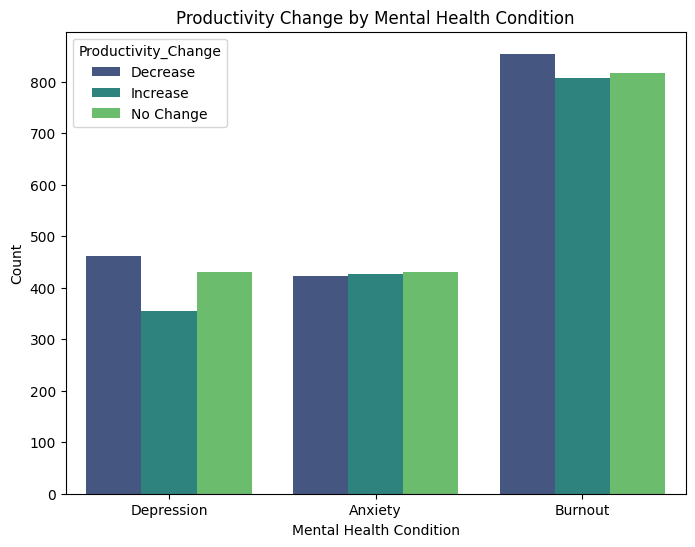

In [ ]:
#Mental Health Condition vs. Productivity Change Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Mental_Health_Condition", hue="Productivity_Change", palette="viridis")
plt.title("Productivity Change by Mental Health Condition")
plt.xlabel("Mental Health Condition")
plt.ylabel("Count")
plt.show()

This plot shows the impact of mental health conditions on productivity:

1. **Burnout** leads to the highest decrease in productivity compared to other conditions.
2. **Depression** shows a balanced distribution among productivity decrease, no change, and increase.
3. **Anxiety** has a similar pattern to depression, with fewer cases of productivity decrease compared to burnout.

Burnout has the strongest negative effect on productivity.

<ipython-input-21-252699ccbd39>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Mental_Health_Condition', y='Hours_Worked_Per_Week', palette='Set2')


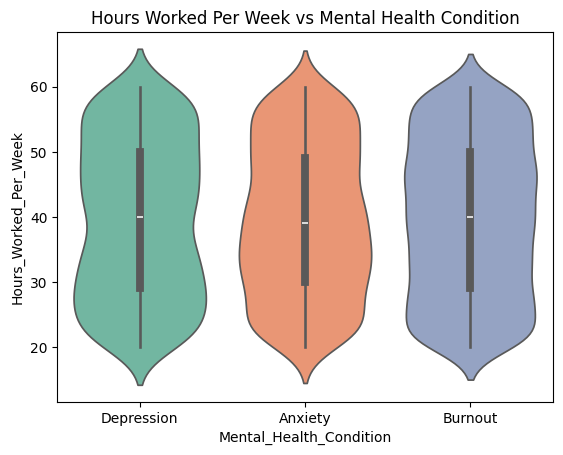

In [ ]:
sns.violinplot(data=df, x='Mental_Health_Condition', y='Hours_Worked_Per_Week', palette='Set2')
plt.title("Hours Worked Per Week vs Mental Health Condition")
plt.show()

The violin plot reveals the following insights about hours worked per week for individuals with different mental health conditions:

1. **Similar Median Hours**: The median hours worked per week are relatively similar across all mental health conditions (Depression, Anxiety, Burnout).

2. **Broader Distribution for Depression and Burnout**: Individuals with Depression and Burnout show a slightly broader range of hours worked, with some working very low or very high hours compared to those with Anxiety.

3. **Anxiety Shows Slightly Narrower Spread**: Anxiety appears to have a slightly more concentrated distribution of hours worked per week.

4. **Outliers Exist Across All Groups**: There are a few individuals in each category working significantly higher or lower hours, indicating potential exceptions or unique circumstances.

This indicates that hours worked per week may not drastically differ across these mental health conditions but could still play a role in their development when combined with other factors.

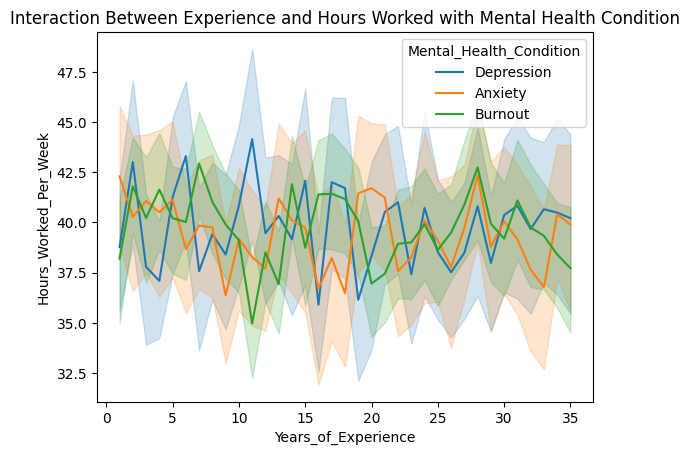

In [ ]:
sns.lineplot(data=df, x='Years_of_Experience', y='Hours_Worked_Per_Week', hue='Mental_Health_Condition')
plt.title("Interaction Between Experience and Hours Worked with Mental Health Condition")
plt.show()

The line plot indicates the following conclusions:

1. **Fluctuations in Hours Worked**: Across different mental health conditions, there is some variability in the hours worked as experience increases.

2. **No Clear Difference by Condition**: Employees with different mental health conditions (Depression, Anxiety, Burnout) show largely overlapping trends in hours worked per week, with no strong distinction between the groups.

3. **Stabilization Over Time**: As employees gain more experience (beyond 20 years), the hours worked per week tend to stabilize, showing less fluctuation.

4. **Inconsistencies at Lower Experience**: Employees with less than 10 years of experience show more fluctuation in hours worked per week.

This suggests that mental health conditions do not significantly impact the number of hours worked when experience is considered.

In [ ]:
# Drop Employee_ID
df = df.drop('Employee_ID', axis=1)

**Label Encoding**

The Mental_Health_Condition column is converted from categorical to numeric using LabelEncoder. Each unique category is assigned a numeric value, preparing the data for machine learning models.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to the 'Mental_Health_Condition' column
df['Mental_Health_Condition'] = le.fit_transform(df['Mental_Health_Condition'])

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns
numerical_cols = df.select_dtypes(include=['int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Check the unique values again to understand the current encoding
print(df['Mental_Health_Condition'].unique())

# Assuming that 'Mental_Health_Condition' should be one of the following:
# ['depression', 'anxiety', 'none', 'burnout']

# If this column needs manual correction (replace these with correct values or labels):
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].replace({
    1.41653913: 'depression',
    -1.39852273: 'anxiety',
    0.0090082: 'none',  # Adjust these mappings according to the actual meaning of the values
})

# After this, we can use LabelEncoder to encode the categorical column.
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the 'Mental_Health_Condition' column
df['Mental_Health_Condition'] = le.fit_transform(df['Mental_Health_Condition'])

# Check if the encoding was successful
print(df['Mental_Health_Condition'].unique())  # Now should show numeric values like 0, 1, 2, etc.


[ 1.41653913 -1.39852273  0.0090082 ]
[2 0 1]


In [ ]:
print(df['Mental_Health_Condition'].unique())

[2 0 1]


**Splitting Dataset and Applying Machine Learning Models**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
categorical_columns = ['Gender', 'Job_Role', 'Industry', 'Work_Location',
                       'Stress_Level',
                        'Access_to_Mental_Health_Resources',
                       'Productivity_Change', 'Satisfaction_with_Remote_Work','Physical_Activity',
                       'Social_Isolation_Rating',
                       'Sleep_Quality', 'Region']

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
df_encoded.head()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Mental_Health_Condition,Company_Support_for_Remote_Work,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,...,Social_Isolation_Rating_0.004446116532035369,Social_Isolation_Rating_0.7215616862151356,Social_Isolation_Rating_1.4386772558982357,Sleep_Quality_Good,Sleep_Quality_Poor,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,-0.796378,-0.480088,0.622767,-0.120587,-0.697830,2,-1.435264,False,True,False,...,False,False,False,True,False,False,True,False,False,False
1,-0.088093,-1.478151,1.044388,-0.767744,-1.406862,0,-0.720420,False,False,False,...,True,False,False,True,False,True,False,False,False,False
2,1.594083,0.418168,0.538443,0.742290,1.429268,0,1.424112,False,True,False,...,False,True,False,False,True,False,False,True,False,False
3,-1.239056,0.218556,-0.642094,0.095132,0.720235,2,-0.005576,True,False,False,...,True,False,False,False,True,False,True,False,False,False
4,0.708727,1.416231,-0.389122,0.958009,-0.697830,1,-0.005576,True,False,False,...,True,False,False,False,False,False,False,True,False,False


In [ ]:
# Separate features and targets
X = df_encoded.drop(['Mental_Health_Condition'], axis=1)
y = df_encoded[['Mental_Health_Condition']]  # Adjust based on your needs

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Predictions: Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report for detailed metrics (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.4670

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.02      0.04       269
           1       0.47      0.95      0.63       479
           2       0.21      0.02      0.04       252

    accuracy                           0.47      1000
   macro avg       0.35      0.33      0.24      1000
weighted avg       0.38      0.47      0.32      1000



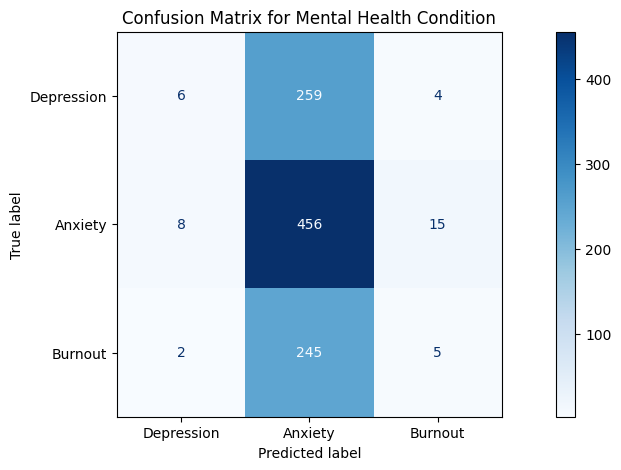

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))

# Create and plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test['Mental_Health_Condition'],  # True labels
    y_pred,  # Predicted labels
    display_labels=['Depression', 'Anxiety', 'Burnout'],  # Label names
    cmap='Blues',
    ax=ax
)

ax.set_title("Confusion Matrix for Mental Health Condition")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

  Depression       0.00      0.00      0.00       269
     Anxiety       0.48      1.00      0.65       479
     Burnout       0.00      0.00      0.00       252

    accuracy                           0.48      1000
   macro avg       0.16      0.33      0.22      1000
weighted avg       0.23      0.48      0.31      1000



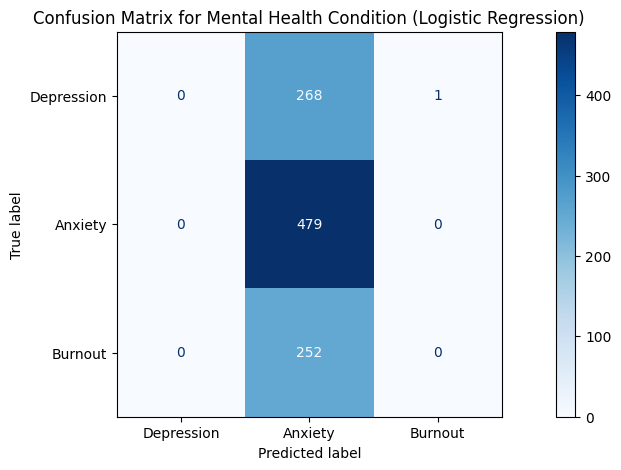

In [ ]:
# 1. Train the Logistic Regression Model
model_lr = LogisticRegression(max_iter=1000)  # You can adjust max_iter if convergence issues occur
model_lr.fit(X_train, y_train)  # X_train and y_train are your training features and labels

# 2. Predict on the test set
y_pred_lr = model_lr.predict(X_test)  # y_pred_lr will contain predicted labels

# 3. Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test['Mental_Health_Condition'], y_pred_lr, target_names=['Depression', 'Anxiety', 'Burnout']))

# 4. Confusion Matrix
fig, ax = plt.subplots(figsize=(14, 5))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test['Mental_Health_Condition'],  # Actual values (True labels)
    y_pred_lr,  # Predicted values
    display_labels=['Depression', 'Anxiety', 'Burnout'],  # Class labels
    cmap='Blues',  # Color map
    ax=ax
)

ax.set_title("Confusion Matrix for Mental Health Condition (Logistic Regression)")
plt.show()

Classification Report for Decision Tree:
              precision    recall  f1-score   support

  Depression       0.27      0.26      0.26       269
     Anxiety       0.48      0.48      0.48       479
     Burnout       0.28      0.30      0.29       252

    accuracy                           0.38      1000
   macro avg       0.35      0.35      0.35      1000
weighted avg       0.38      0.38      0.38      1000



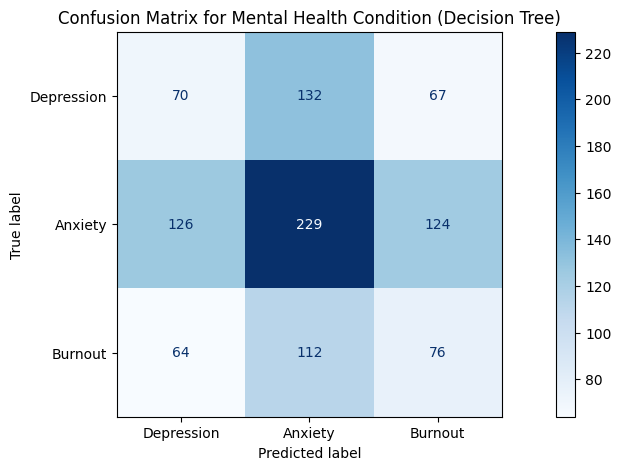

In [ ]:
# 1. Train the Decision Tree Model
model_dt = DecisionTreeClassifier(random_state=42)  # You can adjust the parameters as needed
model_dt.fit(X_train, y_train)  # X_train and y_train are your training features and labels

# 2. Predict on the test set
y_pred_dt = model_dt.predict(X_test)  # y_pred_dt will contain predicted labels

# 3. Classification Report
print("Classification Report for Decision Tree:")
print(classification_report(y_test['Mental_Health_Condition'], y_pred_dt, target_names=['Depression', 'Anxiety', 'Burnout']))

# 4. Confusion Matrix
fig, ax = plt.subplots(figsize=(14, 5))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test['Mental_Health_Condition'],  # Actual values (True labels)
    y_pred_dt,  # Predicted values
    display_labels=['Depression', 'Anxiety', 'Burnout'],  # Class labels
    cmap='Blues',  # Color map
    ax=ax
)

ax.set_title("Confusion Matrix for Mental Health Condition (Decision Tree)")
plt.show()